<a href="https://colab.research.google.com/github/ksashtekar/machine-learning/blob/master/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

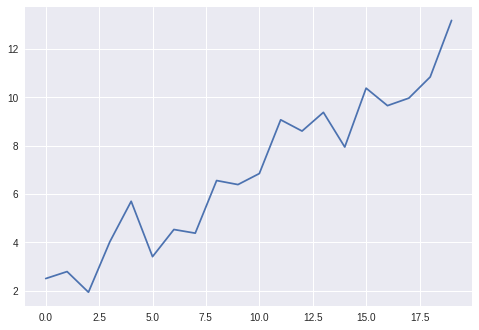

In [1]:
import numpy
import matplotlib
import tensorflow as tf

num_samples, w, b = 20, 0.5, 2
xs = numpy.asarray(range(num_samples))
ys = numpy.asarray([x * w + b + numpy.random.normal() for x in range(num_samples)])

matplotlib.pyplot.plot(xs, ys)

In [0]:

class Linear(object):
  def __init__(self):
    self.w = tf.get_variable(
              "w", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
    self.b = tf.get_variable(
              "b", dtype=tf.float32, shape=[], initializer=tf.zeros_initializer())
    
  def __call__(self, x):
    return self.w * x + self.b
      

In [0]:
xtf = tf.placeholder(tf.float32, [num_samples], "xs")
ytf = tf.placeholder(tf.float32, [num_samples], "ys")
model = Linear()
model_output = model(xtf)

cov = tf.reduce_sum((xtf - tf.reduce_mean(xtf)) * (ytf - tf.reduce_mean(ytf)))
var = tf.reduce_sum(tf.square(xtf - tf.reduce_mean(xtf)))
w_hat = cov / var
b_hat = tf.reduce_mean(ytf) - w_hat * tf.reduce_mean(xtf)

solve_w = model.w.assign(w_hat)
solve_b = model.b.assign(tf.reduce_mean(ytf) - w_hat * tf.reduce_mean(xtf))

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


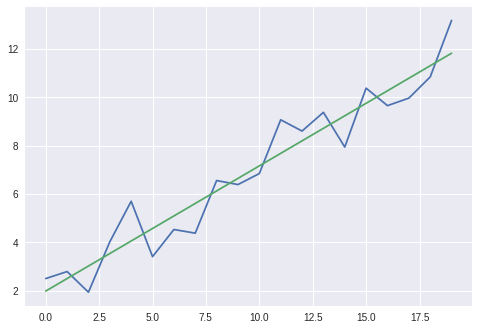

In [5]:
with tf.train.MonitoredSession() as sess:
  sess.run([solve_w, solve_b], feed_dict={xtf:xs, ytf:ys})
  preds = sess.run(model_output, feed_dict={xtf:xs, ytf:ys})
  
matplotlib.pyplot.plot(xs, ys)
matplotlib.pyplot.plot(xs, preds)